<a href="https://colab.research.google.com/github/MahmudulHasanSiyam/FakeNewsDetection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#### Import the Libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import re
import string


In [ ]:
#loading the data from csv file to a Pandas DataFrame
#read_csv function will help us to load the data from cs file to pandas data frame
df_fake = pd.read_csv("/content/drive/MyDrive/CSE Spring-2022/Data Mining Lab/Project/Fake News Detection/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/CSE Spring-2022/Data Mining Lab/Project/Fake News Detection//True.csv")



In [ ]:
# print the first 10 rows of the false news dataframe
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
# print the first 10 rows of the true news dataframe
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
#classify column 0 for false news and 1 for true news 
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
#Now, I will take 10 rows of each data set formal manual testing and also remove that rows from the main dataset
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis=0, inplace=True)

In [ ]:
#Now, I will save manual testing file as csv file
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [ ]:
#Now, marge our main data frame which is df-fake and df-true
df_marge = pd.concat([df_fake,df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
#In data frame we are not going to use (title,subject,date) column
#Now, remove this three column from the dataset
df = df_marge.drop(["title","subject","date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
#Let's suffle the data set
df = df.sample(frac=1)

In [ ]:
#Check the data frame
df.head(10)

,text,class
9736,The scene below is from the movie KILLING EURO...,0
5335,During an interview on CBS s Face the Nation S...,0
11618,YANGON (Reuters) - A spokesman for Myanmar lea...,1
20852,A young patriot made this video to show the hy...,0
20567,There is no reason to believe the welfare of o...,0
18409,MADRID (Reuters) - Spain s King Felipe VI said...,1
10629,Newt Gingrich was promoting his new book Unde...,0
6581,Donald Trump hasn t even secured the nominatio...,0
1976,WASHINGTON (Reuters) - Krassi Nikov evacuated ...,1
687,"Donald Trump insulted the People s House, so...",0


In [ ]:
#Let's check is there any null value is present or not
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
#Now, Remove all the (special charecter, dot, other unnecessary charecter) which is present data frame
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
#Convert the data text
df["text"] = df["text"].apply(word_drop)

In [ ]:
#Let's see the data frame
df.head(10)

,text,class
9736,the scene below is from the movie killing euro...,0
5335,during an interview on cbs s face the nation s...,0
11618,yangon reuters a spokesman for myanmar lea...,1
20852,a young patriot made this video to show the hy...,0
20567,there is no reason to believe the welfare of o...,0
18409,madrid reuters spain s king felipe vi said...,1
10629,newt gingrich was promoting his new book unde...,0
6581,donald trump hasn t even secured the nominatio...,0
1976,washington reuters krassi nikov evacuated ...,1
687,donald trump insulted the people s house so...,0


###Visualization

###Barchart

<BarContainer object of 2 artists>

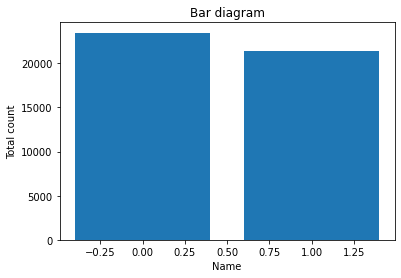

In [ ]:
#Barchart apply in health dataset
data = df['class'].value_counts()

name = data.index
count = data.values

plt.title("Bar diagram")
plt.xlabel('Name')
plt.ylabel('Total count')

plt.bar(name,count)

###Piechart

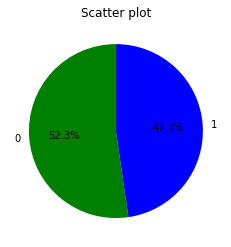

In [ ]:
#Piechart apply in health dataset
slices = df['class'].value_counts()
activity = ['0','1']
colors = ['green','blue']

plt.pie(slices,
        labels=activity,
        colors=colors,
        startangle=90,
        shadow=False,
        autopct="%1.1f%%",
        radius= 1) 

plt.title('Scatter plot')
plt.show()

###Boxplot

       text    class
0 -1.269972  0.90302
1  0.373266 -1.14052


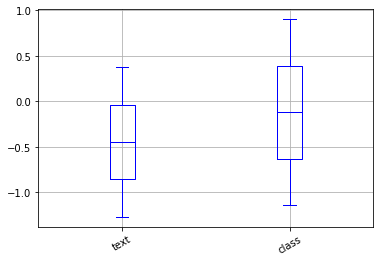

In [ ]:
#Boxplot apply in health dataset

dataframe = pd.DataFrame(np.random.randn(2,2), columns=['text','class'])
 
print(dataframe.head())

dataframe.boxplot(grid='false', color='blue',fontsize=10, rot=30 )


###Model Implementation

In [ ]:
#Define dependent and independent variable as x and y
x = df["text"]
y = df["class"]

In [ ]:
#Splitting that dataset into train and test
x_train, x_test, y_tarin, y_test = train_test_split(x,y, test_size = .25)

In [ ]:
#Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Now, we need to vectorized the text
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(x_train)
xv_test = vectrorization.transform(x_test)

###LogisticRegration

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Fitting the data 
LR = LogisticRegression()
LR.fit(xv_train, y_tarin)

LogisticRegression()

In [ ]:
#Let's shift the score that model
LR.score(xv_test, y_test)

0.9870766488413547

In [ ]:
#Predict the classification
pred_LR = LR.predict(xv_test)

In [ ]:
#Classification Report
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.98      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



###KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNNC = KNeighborsClassifier(n_neighbors=10)
KNNC.fit(xv_train, y_tarin)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
KNNC.score(xv_test, y_test)

0.6434046345811052

In [ ]:
pred_KNNC = KNNC.predict(xv_test)

In [ ]:
print(classification_report(y_test, pred_KNNC))

              precision    recall  f1-score   support

           0       0.60      0.99      0.74      5873
           1       0.95      0.27      0.41      5347

    accuracy                           0.64     11220
   macro avg       0.77      0.63      0.58     11220
weighted avg       0.77      0.64      0.59     11220



###DecisionTreeClassifier

```
# This is formatted as code
```



In [ ]:
#import decision tree classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Fitting the data 
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_tarin)

DecisionTreeClassifier()

In [ ]:
#Let's shift the score that model
DT.score(xv_test, y_test)

0.996524064171123

In [ ]:
#Predict the classification
pred_DT = DT.predict(xv_test)

In [ ]:
#Classification Report
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5873
           1       1.00      1.00      1.00      5347

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



###Gradiant Boosting Classification

In [ ]:
#import gradiant boosting classification
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Fitting the data 
GBC  = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_tarin)

GradientBoostingClassifier(random_state=0)

In [ ]:
#Let's shift the score that model
GBC.score(xv_test, y_test)

0.9950980392156863

In [ ]:
#Predict the classification
pred_GBC = GBC.predict(xv_test)

In [ ]:
#Classification Report
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5873
           1       0.99      1.00      0.99      5347

    accuracy                           1.00     11220
   macro avg       0.99      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



###RandomForestClassifier

In [ ]:
#import Random Forest classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Fitting the data 
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_tarin)

RandomForestClassifier(random_state=0)

In [ ]:
#Let's shift the score that model
RFC.score(xv_test, y_test)

0.9915329768270945

In [ ]:
#Predict the classification
pred_RFC = RFC.predict(xv_test)

In [ ]:
#Classification Report
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



###naive_bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(xv_train, y_tarin)

MultinomialNB()

In [ ]:
mnb.score(xv_test, y_test)

0.9414438502673796

In [ ]:
#Predict the classification
pred_mnb = mnb.predict(xv_test)

In [ ]:
#Classification Report
print(classification_report(y_test, pred_mnb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5873
           1       0.95      0.93      0.94      5347

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



###confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


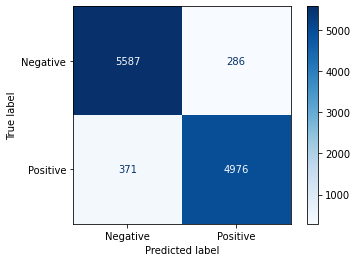

In [ ]:
plot_confusion_matrix(mnb, xv_test, y_test, cmap='Blues', display_labels=['Negative','Positive'])
plt.show()

In [ ]:
#Manual testing field
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = vectrorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR),
                                                                                                              output_lable(pred_DT),
                                                                                                              output_lable(pred_GBC),
                                                                                                              output_lable(pred_RFC)))

###Testing fake news


In [ ]:
#Testing fake news
news = str(input())
manual_testing(news)




LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
#Testing fake news
news = str(input())
manual_testing(news)

Indonesia to buy $1.14 billion worth of Russian jets	JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is